In [1]:
import numpy as np 
from PIL import Image 
from matplotlib import pyplot as plt

In [2]:
def K_m(obs, num=2, gen=1):
    metric = np.vectorize(max)
    dim = obs.shape[-1]
    e_min = np.array([obs[:, d].min() for d in range(dim)])
    e_max = np.array([obs[:, d].max() for d in range(dim)]) 
    e_center = (e_min + e_max) / 2
    r = np.max(e_max.max() - e_min.min()) / 2
    alpha = np.linspace(0, 2*np.pi, num+1)[:-1]
    kernels = e_center + r*np.array([np.cos(alpha), np.sin(alpha)] + [[0]*(num) for _ in range(dim-2)]).T
    for _ in range(gen):
        distance_e = np.array([np.abs(kernels[:, d] - np.array([obs[:, d]]).T) for d in range(dim)])
        distance = np.array([metric(*distance_e[:, :, n]) for n in range(num)]).T
        am = distance.argmin(axis=1)
        kernels = np.array([[obs[am==n, d].mean() for d in range(dim)]for n in range(num) ])
    sorted_id = [0] * num
    for i in am:
        sorted_id[i] += 1
    return kernels[sorted_id].astype('int')


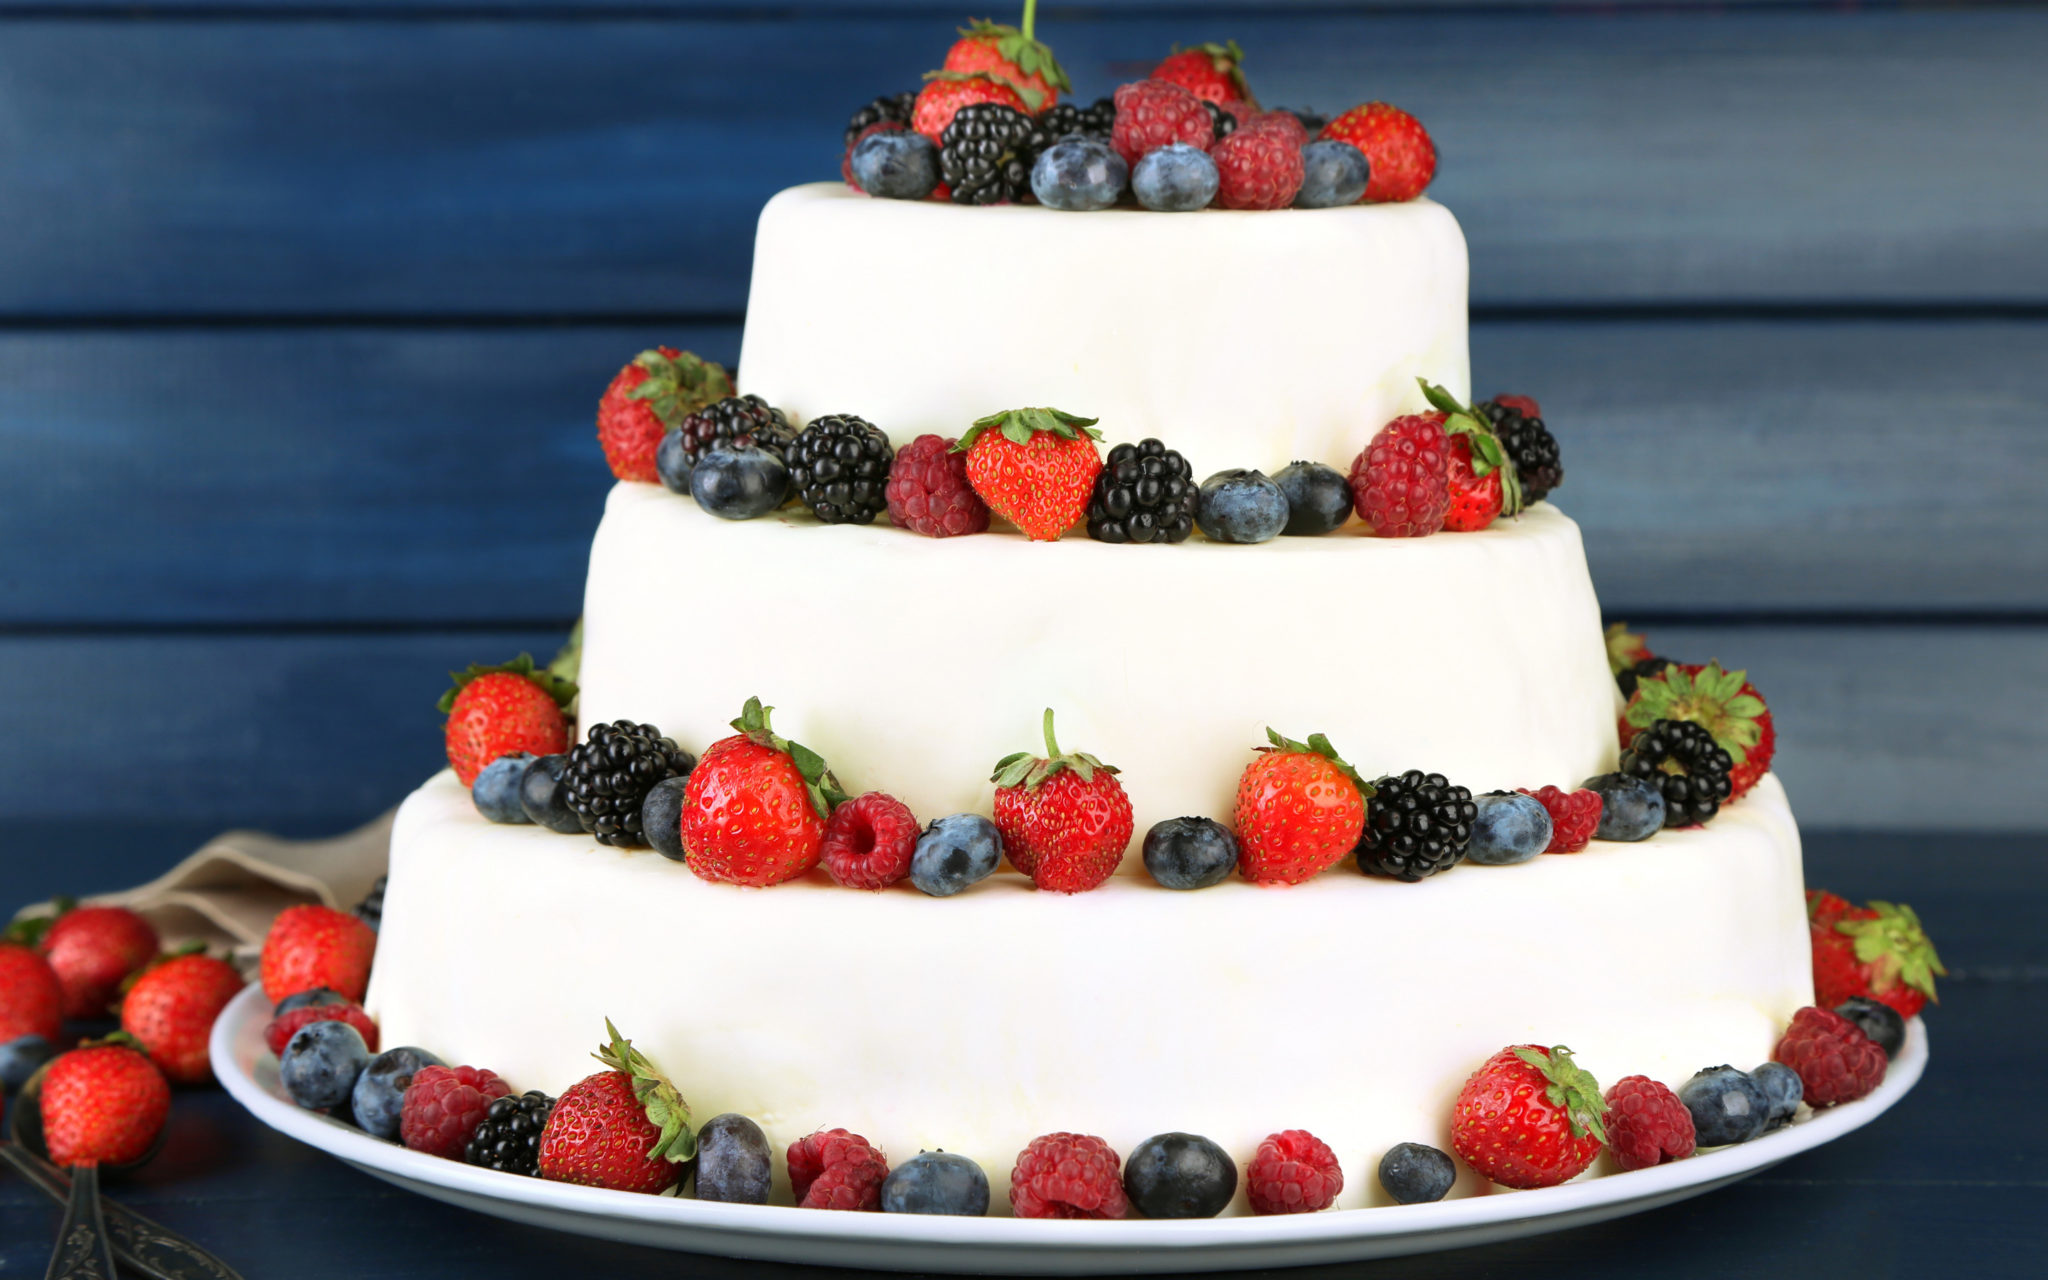

In [24]:
path = "img/cake.jpg"
with Image.open(path) as img:
    data = np.asarray(img)
data_shape = data.shape
data = data.reshape(data_shape[0]*data_shape[1], data_shape[2])
img

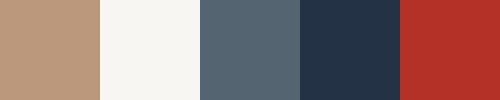

In [25]:
kernel_num = 5 if data.shape[0] >= 5 else data.shape[0]
# data_slice = data.shape[0] // 1000
data_slice = 100 if data.shape[0]//kernel_num > 100 else 1

gen_coloros = K_m(data[::data_slice], num=kernel_num, gen=10)
palitra = Image.new('RGB', (100*kernel_num, 100))
for i, color in enumerate(gen_coloros):
    palitra.paste(tuple(color), [100*i, 0, 100*(i+1), 100])
palitra